In [20]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image

# Loading the dataset
train_dataset = h5py.File('C:\\Users\\79491\\Desktop\\train_catvnoncat.h5', "r")
test_dataset = h5py.File('C:\\Users\\79491\\Desktop\\test_catvnoncat.h5', "r")

# Extracting data
original_train_X = np.array(train_dataset["train_set_x"][:])
original_train_Y = np.array(train_dataset["train_set_y"][:])
classes = np.array(train_dataset["list_classes"][:])

# Splitting the data (my sbu student id is:115996522)
new_train_X = original_train_X[:162]
new_train_Y = original_train_Y[:162]
new_test_X = original_train_X[162:]
new_test_Y = original_train_Y[162:]

# Reshaping
new_train_Y = new_train_Y.reshape((1, new_train_Y.shape[0]))
new_test_Y = new_test_Y.reshape((1, new_test_Y.shape[0]))

# Normalizing
new_train_X_flat = (new_train_X.reshape(new_train_X.shape[0], -1)/255).T
new_test_X_flat = (new_test_X.reshape(new_test_X.shape[0], -1)/255).T

In [21]:
# Flatten and normalize
new_train_X_flat = (new_train_X.reshape(new_train_X.shape[0], -1) / 255).T
new_test_X_flat = (new_test_X.reshape(new_test_X.shape[0], -1) / 255).T
print(new_train_X_flat.shape)

(12288, 162)


In [22]:
# Sigmoid Function
def sigmoid(z):
    """
    Compute the sigmoid of z
    """
    return 1 / (1 + np.exp(-z))

# Propagate function
def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    return dw, db, cost

X = new_train_X_flat
Y = new_train_Y

dim = new_train_X_flat.shape[0]
w = np.zeros((dim, 1))
b = 0

num_iterations = 10000
learning_rate = 0.006
costs = []

for i in range(num_iterations):
    dw, db, cost = propagate(w, b, X, Y)
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)
    if i % 50 == 0:
        costs.append(cost)
        print(f"Cost after iteration {i}: {cost}")

Cost after iteration 0: 0.6931471805599453
Cost after iteration 50: 0.6869130403808718
Cost after iteration 100: 0.5989310388831429
Cost after iteration 150: 0.5252993005005481
Cost after iteration 200: 0.4581799642679117
Cost after iteration 250: 0.3957908364099002
Cost after iteration 300: 0.3384818627438235
Cost after iteration 350: 0.2888222683124012
Cost after iteration 400: 0.2559114890182844
Cost after iteration 450: 0.240108642173533
Cost after iteration 500: 0.22730985227885472
Cost after iteration 550: 0.21582155444616852
Cost after iteration 600: 0.20543406279645668
Cost after iteration 650: 0.19598785483381775
Cost after iteration 700: 0.18735600332501764
Cost after iteration 750: 0.1794351118627449
Cost after iteration 800: 0.17213951804636873
Cost after iteration 850: 0.1653973343537141
Cost after iteration 900: 0.15914761165178154
Cost after iteration 950: 0.15333823390891715
Cost after iteration 1000: 0.14792431347449211
Cost after iteration 1050: 0.14286694253662077
Co

Cost after iteration 8800: 0.02111725906600748
Cost after iteration 8850: 0.0209979006896788
Cost after iteration 8900: 0.020879862417088516
Cost after iteration 8950: 0.020763122690806126
Cost after iteration 9000: 0.0206476604169323
Cost after iteration 9050: 0.02053345495277017
Cost after iteration 9100: 0.020420486094886708
Cost after iteration 9150: 0.02030873406754929
Cost after iteration 9200: 0.020198179511524656
Cost after iteration 9250: 0.020088803473226675
Cost after iteration 9300: 0.019980587394200458
Cost after iteration 9350: 0.019873513100930378
Cost after iteration 9400: 0.019767562794961235
Cost after iteration 9450: 0.019662719043320634
Cost after iteration 9500: 0.01955896476923231
Cost after iteration 9550: 0.01945628324311052
Cost after iteration 9600: 0.019354658073824547
Cost after iteration 9650: 0.019254073200225465
Cost after iteration 9700: 0.019154512882924603
Cost after iteration 9750: 0.019055961696316116
Cost after iteration 9800: 0.0189584045208346
Cos

Training accuracy: 100.0%
Test accuracy: 48.93617021276596%
Indices of incorrect predictions: [ 0  1  2  5  7  8  9 10 13 15 17 21 23 26 30 33 34 35 36 38 42 44 45 46]


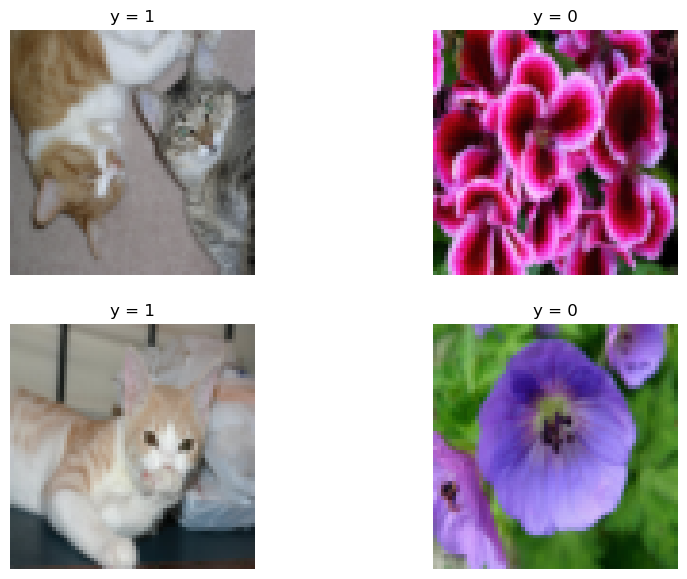

In [23]:
#Predictions
A_train = sigmoid(np.dot(w.T, new_train_X_flat) + b)
A_test = sigmoid(np.dot(w.T, new_test_X_flat) + b)
Y_prediction_train = (A_train >= 0.5) * 1.0
Y_prediction_test = (A_test >= 0.5) * 1.0

#Results
print("Training accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_train - new_train_Y)) * 100))
print("Test accuracy: {}%".format(100 - np.mean(np.abs(Y_prediction_test - new_test_Y)) * 100))

incorrect_predictions = np.where(Y_prediction_test != new_test_Y)[1]
print(f"Indices of incorrect predictions: {incorrect_predictions}")

# Displaying incorrect predictions
def display_images(indices, images_set):
    fig = plt.figure(figsize=(10, 7))
    for i, idx in enumerate(indices):
        fig.add_subplot(2, 2, i+1)
        plt.imshow(images_set[idx])
        plt.axis('off')
        plt.title("y = " + str(new_test_Y[0, idx]))

display_images(incorrect_predictions[:4], new_test_X)